# Particle filter with the optimal proposal
Implementation with a simple example from Snyder 2011. <br>
Snyder, C. (2011, September). Particle filters, the “optimal” proposal and high-dimensional systems. In Proceedings of the ECMWF Seminar on Data Assimilation for atmosphere and ocean (pp. 1-10).

In [112]:
# Libraries
import os
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import *
import pylab as plt

### Example of weight collapse with a two component state vector

(0.0, 2.0)

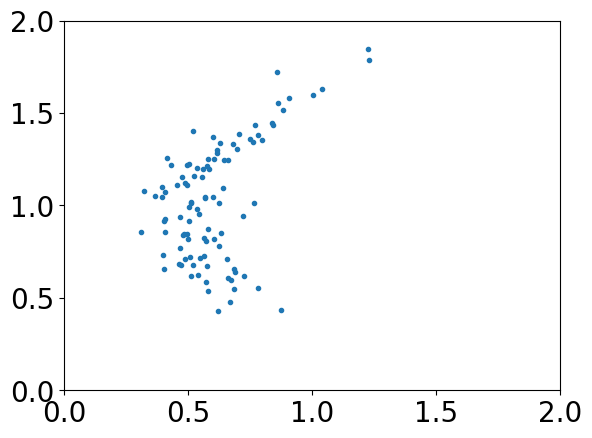

In [113]:
# prior distribution
sample_size = 100
eps = np.random.normal(loc=0, scale=0.1, size=sample_size)

x_1 = np.random.normal(loc=0, scale=0.3, size=sample_size) + eps
x_2= x_1**2 + 0.5 + eps

# observation vector
y = 1.1 * np.ones(len(x_1))

plt.figure()
plt.plot(x_2, x_1+1, '.')
plt.xlim(0,2)
plt.ylim(0,2)


# A simple system i.i.d. degrees of freedom

In [114]:
n_run = 400 # Number of simulations
Ne = 1000   # Ensemble size
dim = np.array([10, 40, 160])   # dimensionto test, i.e., number of observation or parameters

### Simulations with the standard particle filter

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\local_kimssr2\Temp\ipykernel_11700\10835860.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('max $\mathrm{w_i}$')


Simulation for the standard PF already performed


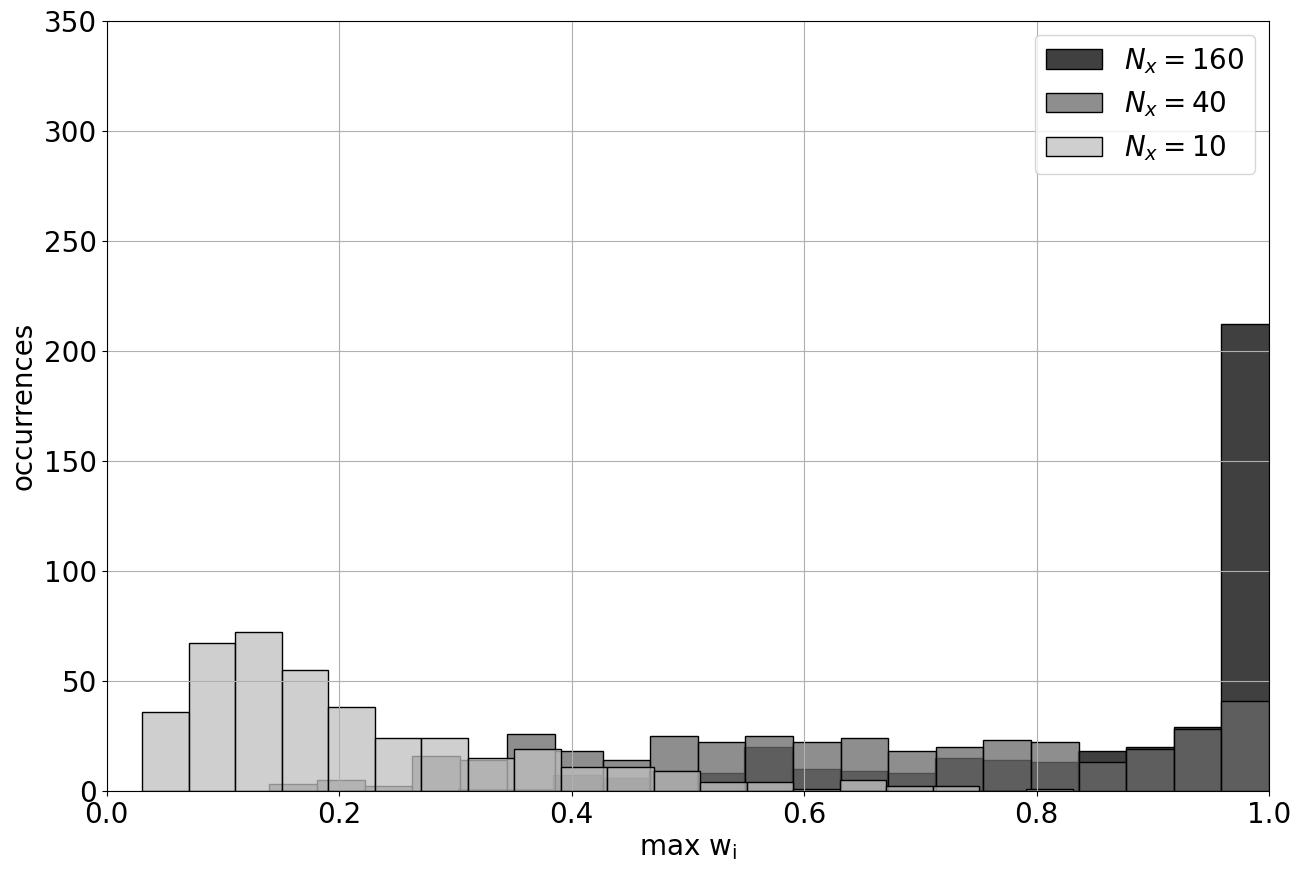

In [ ]:
# check if the file already exist
file_path = 'output/weights_max.txt'

if os.path.isfile(file_path):
    print("Simulation for the standard PF already performed")
    plt.rcParams.update({'font.size': 20})
    p_max = np.loadtxt('output/weights_max.txt')

    # Plot the histograms
    fig = plt.figure(figsize=(15,10))
    sns.histplot(p_max[2,:], binwidth=0.04, color='black', label = '$N_x=160$')
    sns.histplot(p_max[1,:], binwidth=0.04, color='dimgrey', label = '$N_x=40$')
    sns.histplot(p_max[0,:], binwidth=0.04, color='silver', label = '$N_x=10$')
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(0, 350)
    plt.legend()
    plt.xlabel('max $\mathrm{w_i}$')
    plt.ylabel('occurrences')

    plt.savefig('output/histogram_wmax_Fig1.png')
    plt.show()
else:
    print("Running standard particle filter simulations...")

    ## Set the experiment 
    w_max = np.zeros((3, n_run))

    ## Set the particle filter
    for d in range(len(dim)):
        Ny = dim[d]
        print('Dimension:', Ny)

        ## Initialization
        Id = np.identity(Ny)
        # Truth
        x_truth =  np.random.multivariate_normal(np.zeros(Ny), Id)
        # Prior
        x_p = np.zeros((Ny, Ne))
        # Observation operator
        H = Id
        # Error distribution in data
        eps = np.zeros((Ny, 1))
        # Data
        y = np.zeros((Ny, 1))
        ## Set true value of the parameters
        cov_prior = np.identity(Ne)
        x_truth = np.random.multivariate_normal(np.zeros(Ny), Id)
        
        
        for simu in range(n_run):
            print(simu)
            ## Create the priors: 1 prior distribution per parameter
            for i in range(Ny):
                # each row is an ensemble of Ne values for the i:th parameter drawn from p(X) too
                x_p[i, :] =  np.random.multivariate_normal(np.zeros(Ne), cov_prior)
            
            ## Create the synthetic observations
            eps = np.random.multivariate_normal(np.zeros(Ny), Id)
            y = x_truth + eps

            ## Filtering part 
            sigma_lik = 1
            w = np.ones(Ne, dtype=np.float64)
            diff = np.zeros((Ny, Ne))
            diff_squared = np.zeros((Ny, Ne))
            p_yx = np.zeros((Ny, Ne))

            # Calculation of the diff obs-model (model computed with the particles)
            for i in range(Ne):
                diff[:, i] = y - x_p[:, i] # checked
                diff_squared[:, i] = diff[:, i]**2 # checked
            p_yx = (1/sqrt(2*pi*sigma_lik))*np.exp(-0.5*diff_squared/(sigma_lik**2)) 

            # compute the total probability for the likelihood
            p_yx_tot = np.ones(Ne)
            for i in range(Ne):
                for j in range(Ny):
                    p_yx_tot[i] = p_yx_tot[i] * p_yx[j, i]

            # Calculation of the weights
            for i in range(Ne):
                w[i] = p_yx_tot[i] / np.sum(p_yx_tot)
            w_max[d, simu] = np.max(w)
        
    savetxt('output/weights_max.txt', w_max)


### Simulations particle filter with optimal proposal

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
C:\Users\local_kimssr2\Temp\ipykernel_11700\992249804.py:25: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('max $\mathrm{w_i}$')


Simulation for the optimal PF already performed


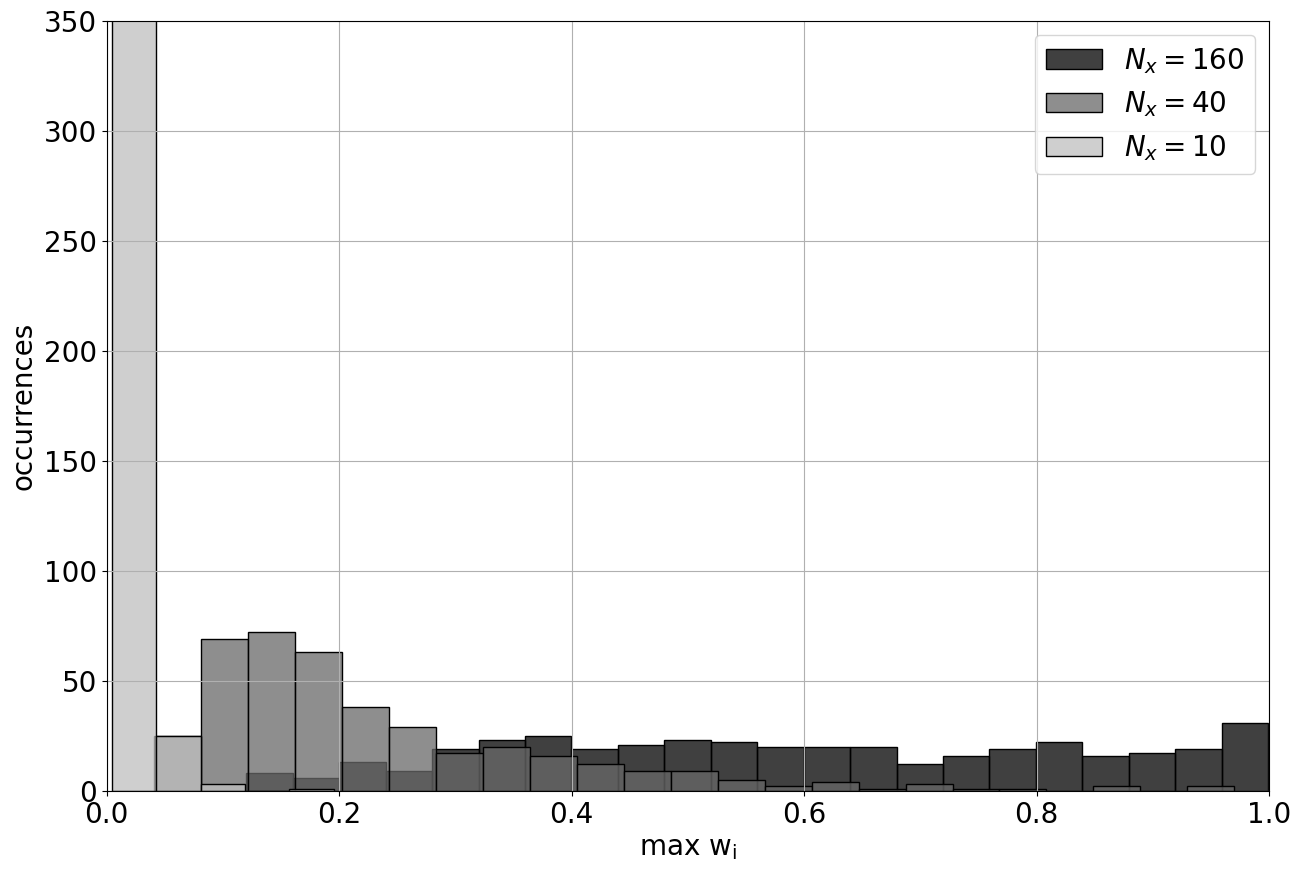

In [ ]:
# Initialize the system with  defining the model and observation operator
a_square = 0.5 # variance of the prior for x_k
q_square = 0.5 # variance of the system noise

## Set the experiment 
w_max = np.zeros((3, n_run))

# check if the file already exist
file_path = 'output/weights_max_OP.txt'

if os.path.isfile(file_path):
    print("Simulation for the optimal PF already performed")
    plt.rcParams.update({'font.size': 20})

    p_max = np.loadtxt('output/weights_max_OP.txt')
    # Plot the histograms
    fig = plt.figure(figsize=(15,10))
    sns.histplot(p_max[2,:], binwidth=0.04, color='black', label = '$N_x=160$')
    sns.histplot(p_max[1,:], binwidth=0.04, color='dimgrey', label = '$N_x=40$')
    sns.histplot(p_max[0,:], binwidth=0.04, color='silver', label = '$N_x=10$')
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(0, 350)
    plt.legend()
    plt.xlabel('max $\mathrm{w_i}$')
    plt.ylabel('occurrences')

    plt.savefig('output/PFOPhistogram_wmax_Fig1.png')
    plt.show()
    
else:
    print("Running optimal proposal particle filter simulations...")

    ## Set the particle filter
    for d in range(len(dim)):
        Ny = dim[d]
        print('Dimension:', Ny)


        ## Initialization
        Id = np.identity(Ny)
        # Truth
        x_truth =  np.random.multivariate_normal(np.zeros(Ny), Id)

        for simu in range(n_run):
            print(simu)
            eta_0 =  np.random.multivariate_normal(np.zeros(Ny), q_square*Id)
            eps_k =  np.random.multivariate_normal(np.zeros(Ny), Id)
            # model states
            x_0 = np.random.multivariate_normal(np.zeros(Ny), Id)
            # System definition
            x_k = sqrt(a_square)*x_truth + eta_0
            # Observational states
            y_k = x_k + eps_k

            # Sample the state vector x_k|x_0, y_k
            prior_xk = np.zeros((Ny,Ne))
            for i in range(Ne):
                # each row is an ensemble of Ne values for the ith parameter drawn from p(X) too
                mu_OP = (sqrt(a_square)* x_0 + q_square*y_k) / (1+q_square)
                var_OP = (a_square + q_square)/ (1+a_square+q_square)
                # Each particle create a set of Ny observations
                prior_xk[:, i] =  np.random.multivariate_normal(np.ones(Ny)*mu_OP, var_OP*np.identity(Ny))
            
            mu_lik_OP = sqrt(a_square) * x_0
            var_lik_OP = 1+q_square


            # Update with the particle filter
            # Filtering part 
            w = np.ones(Ne, dtype=np.float64)
            diff = np.zeros((Ny, Ne))
            diff_squared = np.zeros((Ny, Ne))
            p_yx = np.zeros((Ny, Ne))
            p_yx_tot = np.ones(Ne)

            # Calculation of the diff obs-model (model computed with the particles)
            for i in range(Ne):
                diff[:, i] = y_k - prior_xk[:,i]
                diff_squared[:, i] = diff[:, i]**2
            p_yx = (1/sqrt(2*pi*var_lik_OP))*np.exp(-0.5*diff_squared/var_lik_OP) 

            # compute the total probability for the likelihood: y is a vector p(y|xi) = p(y1|xi) x ... x p(y_Ny|xi)
            for i in range(Ne):
                for j in range(Ny):
                    p_yx_tot[i] = p_yx_tot[i] * p_yx[j, i]

            # Calculation of the weights
            for i in range(Ne):
                w[i] = p_yx_tot[i] / np.sum(p_yx_tot)

            ## Rapid check with the histograms of the w_max
            w_max[d, simu] = np.max(w)
            savetxt('output/weights_max_OP.txt', w_max)
